# Regresja liniowa (aproksymacja średniokwadratowa)

* Czytanka: Kincaid, Cheney rozdz. 12 ("Smoothing of data and the method of least squares."), str. 495
* [Fajny tutorial od podstaw](https://machinelearningmastery.com/simple-linear-regression-tutorial-for-machine-learning/)
* [Kontynuacja tegoż tutorialu](https://machinelearningmastery.com/implement-simple-linear-regression-scratch-python/)

#### Pytania:
* po co się stosuje regresję liniową?
* w jakich problemach/dziedzinach jest przydatna?
* (*) na co trzeba uważać?

### Krótkie objaśnienie
Mając jakieś dane niejednokrotnie potrzebujemy je "wyjaśnić", tj. znaleźć model matematyczny, który w wygodny sposób opisze te dane. Celem jest łatwiejsza analiza, kompresja, predykcja, etc. W szczególności, wiele danych wykazuje pewną liniowość: dla uproszczenia zajmiemy się funkcjami `R -> R` (np. zależność ceny domu od jego powierzchni), ale oczywiście regresja liniowa zadziała też dla danych o większej ilości wymiarów.

Ogólna zasada: mamy dany zbiór punktów `{(x_i, y_i)}`, chcemy znaleźć takie parametry `a` i `b`, żeby funkcja `y = f(x) = ax + b` jak najlepiej przybliżała nasze dane.

Co to znaczy, że funkcja "dobrze przybliża dane"? Bardzo intuicyjnie: oznacza to, że jeśli porównamy faktyczne wartości w punktach `y_i` z wartościamy naszej funkcji `f`, to w sumie powinny dawać możliwie mały błąd. Warto zaznaczyć: funkcji błędu można wybrać parę, między innymi:
* sumę wartości bezwzględnych różnic pomiędzy `y_i`, a `f(x_i)`
* sumę kwadratów różnic pomiędzy `y_i`, a `f(x_i)`
Z przyczyn matematyczno-techicznych wybierzemy tą drugą funkcję (między innymi jest łatwo i niezawodnie różniczkowalna :)).

#### Pytania (c.d.):
* czemu umawiamy się na konkretny, bardzo prosty model, i staramy się minimalizować błąd? Czy nie lepiej zastosować model, który dokładniej opisze dane? Przecież możemy dobrać modele, które dużo lepiej dopasują się do danych, niż linia prosta...

### Zadanie 1.
Napisz funkcję liczącą błąd średniokwadratowy. Na wejściu musi dostawać dwie tablice/dwa wektory równej długości, a na wyjściu ma zwracać sumę kwadratów różnic pomiędzy kolejnymi elementami tych wektorów.

In [1]:
from typing import List
import numpy as np
import pandas as pd

def rmse(x: List[float], y: List[float]) -> float:
    if len(x) != len(y): raise ValueError("Lists must be of same length")
    return np.mean([(x[i] - y[i]) ** 2 for i in range(len(x))])

In [7]:
rmse([2, 3], [4.5, -1.5])

13.25

### Zadanie 2.

Napisz funkcję pobierającą wektor par floatów lub dwa wektory floatów i zwracającą parametry a i b prostej o równaniu `y = ax + b`, będącej najlepszą aproksymacją tych punktów.

W przypadku opcji z wektorem par, kolejne pary traktujemy jako `x_i` i `y_i` opisane powyżej. W przypadku wyboru dwóch wektorów, traktujemy je jako wektory `x` i `y`.

In [2]:
from typing import Tuple

def lin_reg(xs: List[float], ys: List[float]) -> Tuple[float, float]:
    x_mean = np.mean(xs)
    y_mean = np.mean(ys)
    a = sum((xs[i] - x_mean) * (ys[i] - y_mean) for i in range(len(xs)) ) / sum ((xs[i] - x_mean)**2 for i in range(len(xs)))
    b = y_mean - a * x_mean
    return (a, b)

In [9]:
lin_reg([2, 1, 3], [5, 3, 7])

(2.0, 1.0)

### Zadanie 3.

Napisz klasę enkapsulującą model regresji liniowej. Klasa powinna mieć metody:
* `fit`, przyjmującą punkty, do których będziemy dopasowywać model (sygnatura taka, jak metoda `lin_reg`)
* `predict`, przyjmująca wektor floatów (tylko współrzędna x) i zwracającą predykcje naszego modelu dla tych danych wejściowych
* pole `coeffs`, zwracają współczynniki prostej, którą dopasowywaliśmy

In [19]:
from typing import List, Tuple

class LinearRegressor():
    def __init__(self):
        self._coeffs = None   # type: Optional[Tuple[float, float]]
    
    def fit(self, x: List[float], y: List[float]) -> None:
        self._coeffs = lin_reg(x, y)

    def predict(self, xs: List[float]) -> List[float]:
        return [self._coeffs[0] * x + self._coeffs[1] for x in xs]

    @property
    def coeffs(self) -> Tuple[float, float]:
        if self._coeffs is None:
            raise Exception('You need to call `fit` on the model first.')
        
        return self._coeffs
    

### Zadanie 4.

Przetestuj powyższą klasę używając prawdziwych danych (dopasowując model na danych, następnie licząc błąd średniokwadratowy pomiędzy predykcjami modelu a prawdziwymi danymi).

Przykładowo, mogą to być dane o szwedzkim rynku ubezpieczeń samochodowych, dostępne [tutaj](https://www.math.muni.cz/~kolacek/docs/frvs/M7222/data/AutoInsurSweden.txt).

In [5]:
data = pd.read_csv('data/train.csv')

In [6]:
x = data['GrLivArea']
y = data['SalePrice']

In [21]:
reg = LinearRegressor()
reg.fit(x, y)
reg.coeffs

(107.13035896582502, 18569.025856487482)

In [28]:
print(y[5], reg.predict([x[5]]))

143000 [164480.57476794117]


### Zadanie 5.

Napisz funkcję, która będzie potrafiła narysować wykres danych i dopasowanej do nich prostej, używając klasy `LinearRegressor` do stworzenia modelu.

In [31]:
import matplotlib.pyplot as plt

In [46]:
def plot_data(x: List[float], y: List[float]) -> None:
    plt.figure(figsize=(22,10))
    plt.scatter(x, y)
    reg = LinearRegressor()
    reg.fit(x, y)
    x_pred = [min(x), max(x)]
    y_pred = reg.predict(x_pred)
    plt.plot(x_pred, y_pred, 'red')
    plt.show()

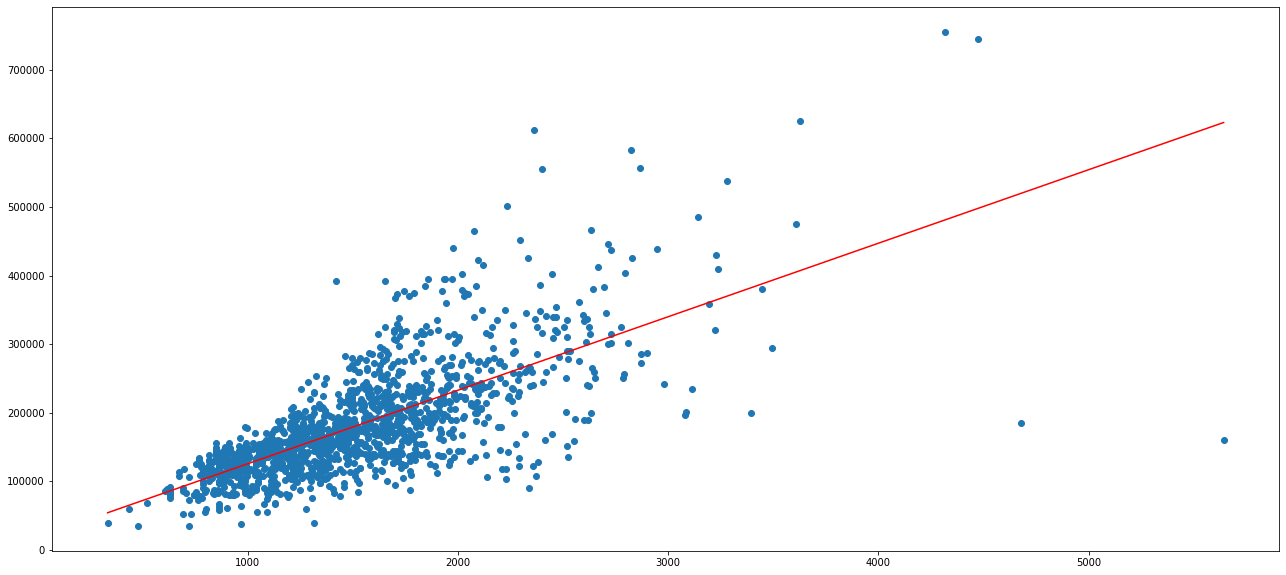

In [47]:
plot_data(x,y)